In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training_data_path = r'C:\Users\harsh\twitter_training.csv'
training_data = pd.read_csv(training_data_path)
training_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
training_data.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
training_data.head()

,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
missing_values = training_data.isnull().sum()
print(missing_values)

ID             0
Entity         0
Sentiment      0
Tweet        686
dtype: int64


In [5]:
def clean_tweet(text):
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    return text

training_data['Cleaned_Tweet'] = training_data['Tweet'].apply(clean_tweet)
training_data.head()

,ID,Entity,Sentiment,Tweet,Cleaned_Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


In [6]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

training_data['Predicted_Sentiment'] = training_data['Cleaned_Tweet'].apply(get_sentiment)
training_data.head()

,ID,Entity,Sentiment,Tweet,Cleaned_Tweet,Predicted_Sentiment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...,Neutral
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,Neutral
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,Neutral
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,Neutral
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,Neutral


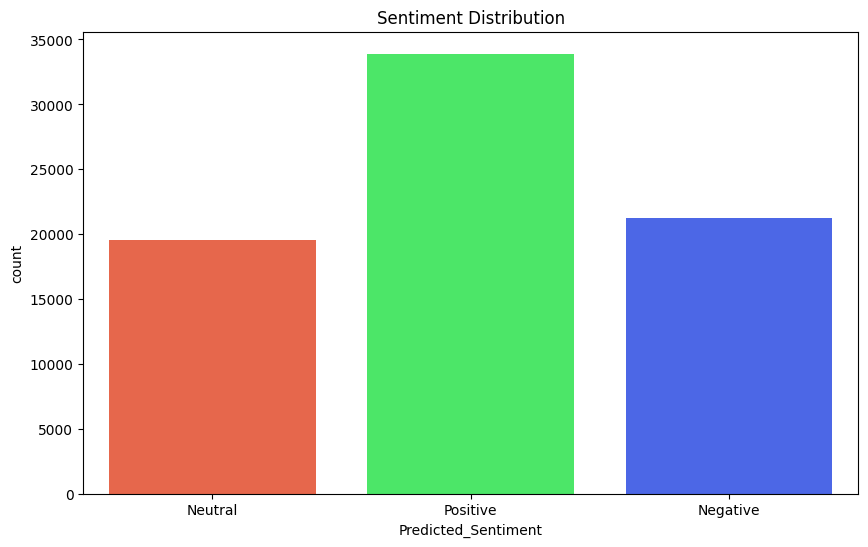

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Predicted_Sentiment', hue='Predicted_Sentiment', data=training_data, palette=['#FF5733', '#33FF57', '#3357FF'], dodge=False, legend=False)
plt.title('Sentiment Distribution')
plt.show()

In [10]:
processed_data_path =r'C:\Users\harsh\processed_twitter_training.csv'
training_data.to_csv(processed_data_path, index=False)